In [257]:
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
#2a
data = pd.read_csv("data/us-states.csv") # Be sure to credit The New York Times as data source in readme.
data["date"] = pd.to_datetime(data["date"])
print(data.head())
data.info()

        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61942 entries, 0 to 61941
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    61942 non-null  datetime64[ns]
 1   state   61942 non-null  object        
 2   fips    61942 non-null  int64         
 3   cases   61942 non-null  int64         
 4   deaths  61942 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.4+ MB


In [259]:
data["new_cases"] = data.groupby("state")["cases"].diff()
print(data[data["state"] == "Washington"].head())

        date       state  fips  cases  deaths  new_cases
0 2020-01-21  Washington    53      1       0        NaN
1 2020-01-22  Washington    53      1       0        0.0
2 2020-01-23  Washington    53      1       0        0.0
4 2020-01-24  Washington    53      1       0        0.0
7 2020-01-25  Washington    53      1       0        0.0


In [260]:
#2b
def plot_new_cases(data, states):
    fig = plt.figure(figsize=(10,5))
    for state in states:
        subset = data[data["state"] == state]
        plt.plot(subset["date"], subset["new_cases"], label=state)
    plt.xlabel("Date")
    plt.ylabel("Number of New Cases")
    plt.title("Daily COVID-19 New Cases by State")
    plt.legend()
    return fig

# Discuss any limitations of your approach in your readme.

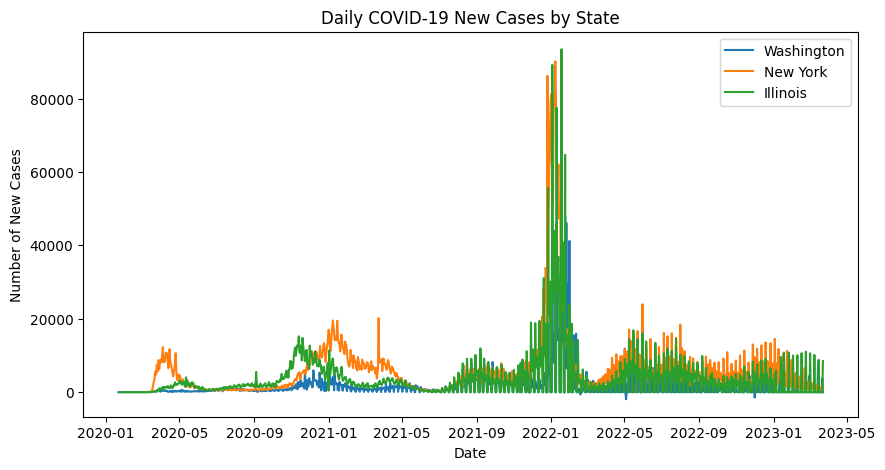

In [261]:
fig = plot_new_cases(data, ["Washington", "New York", "Illinois"])
fig.savefig("plots/2b_new_cases.png", dpi=200, bbox_inches="tight")

In [262]:
#2c
def find_peak_dates(data, state):
    subset = data[data["state"] == state]
    idx = subset["new_cases"].idxmax()
    peak_date = subset.loc[idx, "date"]
    peak_amount = int(subset.loc[idx, "new_cases"])
    return peak_date, peak_amount

In [ ]:
# Test for find_peak_dates
print(find_peak_dates(data, "Washington"))
print(find_peak_dates(data, "New York"))
print(find_peak_dates(data, "Illinois"))
print(find_peak_dates(data, "California"))

(Timestamp('2022-01-18 00:00:00'), 63640)
(Timestamp('2022-01-08 00:00:00'), 90132)
(Timestamp('2022-01-18 00:00:00'), 93423)
(Timestamp('2022-01-10 00:00:00'), 227972)


In [264]:
#2d
def compare_peak_cases(data, state1, state2):
    date1 = find_peak_dates(data, state1)[0]
    date2 = find_peak_dates(data, state2)[0]
    if date1 > date2:
        return state2, (date1 - date2).days
    elif date1 < date2:
        return state1, (date2 - date1).days
    else:
        return "Same Peak Date", 0


In [265]:
# Test for compare_peak_cases
print(compare_peak_cases(data, "Washington", "New York"))
print(compare_peak_cases(data, "Illinois", "California"))
print(compare_peak_cases(data, "Washington", "Illinois"))

('New York', 10)
('California', 8)
('Same Peak Date', 0)


,date,fips,cases,deaths,new_cases
count,1118,1118.0,1.118000e+03,1118.000000,1117.000000
mean,2021-09-10 12:00:00,12.0,3.635996e+06,47132.761181,6752.790510
min,2020-03-01 00:00:00,12.0,2.000000e+00,0.000000,-40527.000000
25%,2020-12-05 06:00:00,12.0,1.051739e+06,19106.250000,0.000000
50%,2021-09-10 12:00:00,12.0,3.413662e+06,48772.000000,2847.000000
75%,2022-06-16 18:00:00,12.0,6.342659e+06,75093.750000,8293.000000
max,2023-03-23 00:00:00,12.0,7.542869e+06,87141.000000,193786.000000
std,NaN,0.0,2.660093e+06,29484.969861,13034.478876


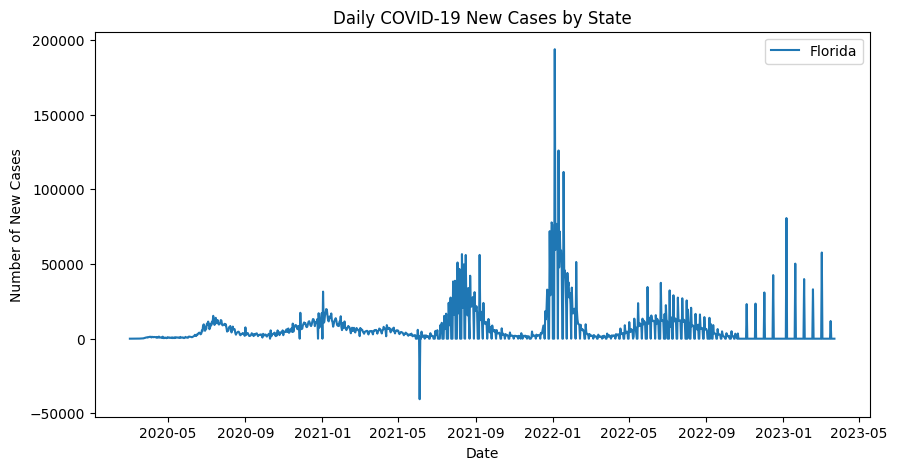

In [268]:
#2e
fl = data[data["state"] == "Florida"]
fl_fig = plot_new_cases(data, ["Florida"])
fl_fig.savefig("plots/2e_fl.png", dpi=200, bbox_inches="tight")
fl.describe()

Count of gaps: 9
Mean gap (days): 14.78
Median gap (days): 14.0
Top gap values:
date
14    8
21    1
Name: count, dtype: int64


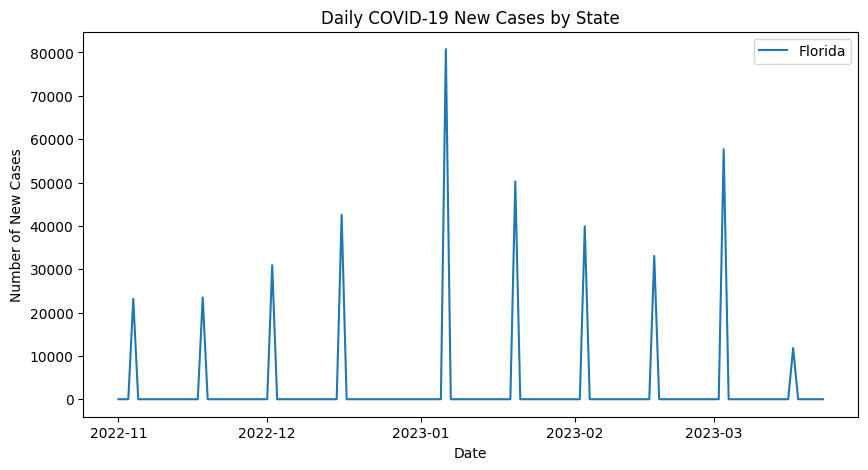

In [269]:
fl_tail = fl[fl["date"] >= "2022-11-01"]
fl_tail_fig = plot_new_cases(fl_tail,["Florida"])
fl_tail_fig.savefig("plots/2e_fl_tail.png", dpi=200, bbox_inches="tight")

# Keep only days with a non-zero report
nz = fl_tail.loc[fl_tail["new_cases"] != 0, "date"].reset_index(drop=True)

# Day gaps between consecutive reporting days
gaps = nz.diff().dropna().dt.days

# Gap summary
print("Count of gaps:", gaps.size)
print("Mean gap (days):", gaps.mean().round(2))
print("Median gap (days):", gaps.median())
print("Top gap values:")
print(gaps.value_counts().sort_index().head(10))